In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100

In [117]:
def dim(l,m):
    return int((1/2)*(l+m)*(m+1)*(l+m+2))

def top_point(l,m):
    return np.array([l/2, (l+2*m)/3])

I = np.array([1,0])
U = np.array([-1/2,1])
V = np.array([-1/2,-1])

def layer(l,m,n):
    multiplicity = 1
    for k in range(n-1):
        if l>0 and m>0:
            multiplicity += 1
            l += -1
            m += -1
        elif l == 0:
            m = max(m-3, 0)
        elif m == 0:
            l = max(l-3, 0)
    points = list()
    points.append(top_point(l,m))
    shifts = np.concatenate((
        np.ones(l)[:,np.newaxis]*(-I),
        np.ones(m)[:,np.newaxis]*(+V),
        np.ones(l)[:,np.newaxis]*(-U),
        np.ones(m)[:,np.newaxis]*(+I),
        np.ones(l)[:,np.newaxis]*(-V),
        np.ones(m)[:,np.newaxis]*(+U)
    ))
    for t in shifts:
        newpoint = points[-1] + t
        points.append(newpoint)
#     for i in range(l):
#         points.append(points[-1] - I)
#     for v in range(m):
#         points.append(points[-1] + V)
#     for u in range(l):
#         points.append(points[-1] - U)
#     for i in range(m):
#         points.append(points[-1] + I)
#     for v in range(l):
#         points.append(points[-1] - V)
#     for u in range(m-1):
#         points.append(points[-1] + U)
    return multiplicity, np.array(points).T

In [22]:
print(dim(13,7), dim(7,13))

1760 3080


In [23]:
top_point(13,7)

array([6.5, 9. ])

In [17]:
top_point(7,13)

array([ 3.5, 11. ])

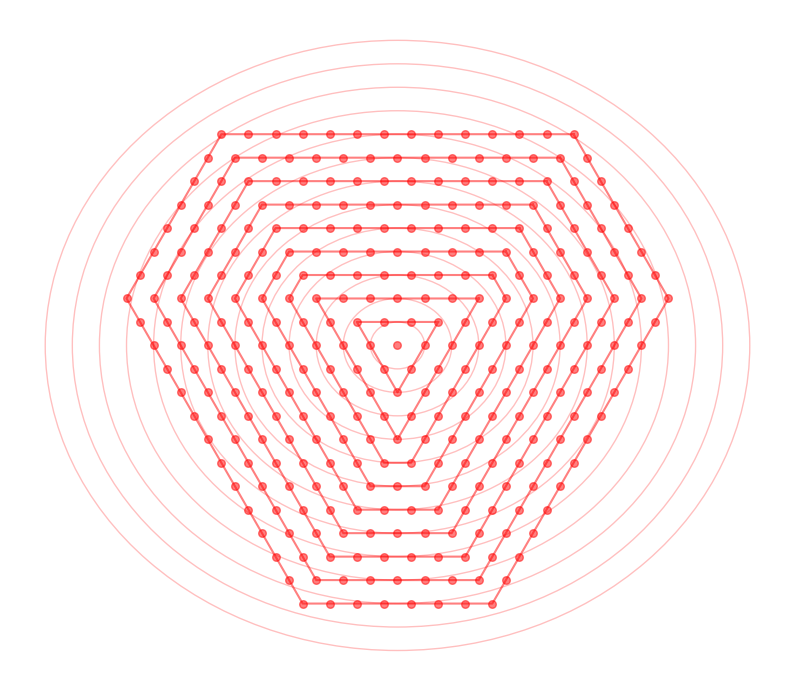

In [141]:
all_points = None
for i in range(10):
    n, points = layer(13,7,i+1)
    
    if points.shape[1] > 1:
        scatter_points = points[:,:-1]
    else:
        scatter_points = points
        
    if all_points is None:
        all_points = scatter_points
    else:
        all_points = np.concatenate((all_points, scatter_points), axis=1)
    
    plt.plot(points[0], points[1], c='r', alpha=0.5)

plt.scatter(all_points[0], all_points[1], s=30, edgecolors='r', facecolors='r', alpha=0.5)
    
for i in range(13):
    plt.gca().add_patch(plt.Circle((0, 0), i+1, edgecolor='r', facecolor='none', alpha=0.25))
plt.gca().set_aspect(np.sqrt(3)/2)
plt.axis('off')
plt.show()